In [2]:
!pip install execnet

In [1]:
import subprocess
import execnet
from matplotlib import pyplot as plt

from PIL import Image
import base64
import numpy as np
from io import BytesIO

from scipy.io import wavfile
from IPython.display import Audio

In [ ]:
    from PIL import Image
    import numpy as np

In [26]:
import execnet
gw = execnet.makegateway("popen//python=python2.7")
channel = gw.remote_exec("""
    import numpy
    array = numpy.array([1,2,3])
    while 1:
        x = channel.receive()
        if x is None:
            break
        array = numpy.append(array, x)
    channel.send(repr(array))
""")
for x in range(10):
    channel.send(x)
channel.send(None)
print (channel.receive())

array([1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
python3_command = "py2file.py arg1 arg2"  # launch your python2 script using bash

process = subprocess.Popen(python3_command.split(), stdout=subprocess.PIPE)
output, error = process.communicate()  # receive output from the python2 script

In [24]:
python3_command = "python2 test_python_2.py"  # launch your python2 script using bash

process = subprocess.Popen(python3_command.split(), stdout=subprocess.PIPE)

output, error = process.communicate()  # receive output from the python2 script
print(output)

print(error)

b''
None


In [ ]:
process.send_signal()

In [6]:
python3_command = "print 'Hello'"  # launch your python2 script using bash

process = subprocess.Popen(python3_command.split(), stdout=subprocess.PIPE)

b''
None


In [13]:
output

b''

In [14]:
print(error)

None


In [8]:

gw = execnet.makegateway("popen//python=/home/obasekore/anaconda3/envs/naoqi_pyrep/bin/python2.7")
channel = gw.remote_exec("""
    import numpy
    array = numpy.array([1,2,3])
    while 1:
        x = channel.receive()
        if x is None:
            break
        array = numpy.append(array, x)
    channel.send(repr(array))
""")


array([1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
for x in range(10):
    channel.send(x)

In [ ]:
channel.send(None)
print (channel.receive())

In [8]:
def showNaoImage(IP, PORT):
  """
  First get an image from Nao, then show it on the screen with PIL.
  """

  camProxy = ALProxy('ALVideoDevice', IP, PORT)
  resolution = 2    # VGA
  colorSpace = 11   # RGB

  videoClient = camProxy.subscribe("python_client", resolution, colorSpace, 5)

#   t0 = time.time()

  # Get a camera image.
  # image[6] contains the image data passed as an array of ASCII chars.
  naoImage = camProxy.getImageRemote(videoClient)

#   t1 = time.time()

  # Time the image transfer.
#   print "acquisition delay ", t1 - t0

  camProxy.unsubscribe(videoClient)


  # Now we work with the image returned and save it as a PNG  using ImageDraw
  # package.

  # Get the image size and pixel array.
  imageWidth = naoImage[0]
  imageHeight = naoImage[1]
  array = naoImage[6]

  # Create a PIL Image from our pixel array.
  im = Image.fromstring("RGB", (imageWidth, imageHeight), array)

  # Save the image.
  im.save("camImage.png", "PNG")
  return im

#   im.show()

In [2]:
gw = execnet.makegateway("popen//python=/media/obasekore/ce3d2447-db57-4289-a3a0-0cba00306dcc/home/obasekore/anaconda3/envs/naoqi_pyrep/bin/python2.7")

channel = gw.remote_exec("""
    from naoqi import ALProxy
    from PIL import Image
    import numpy as np
    import base64
    status = 0
    info = ''
    while 1:
        status+=1
        x = channel.receive()
        if x['mode'] is None:
            info += str(status)+' finished'
            break
        elif x['mode'] == 'command':
            y = ''
            exec(x['data'])
            info = y
            channel.send(repr(info))
        
    channel.send(repr(info))
    motionProxy.stop(0)
    postureProxy.stop(0)
""")

In [5]:
gw = execnet.makegateway("popen//python=/home/obasekore/Documents/choregraphe-suite-2.8.6.23-linux64/bin/python2.orig")

channel = gw.remote_exec("""
    from naoqi import ALProxy

    import base64
    status = 0
    info = ''
    while 1:
        status+=1
        x = channel.receive()
        if x['mode'] is None:
            info += str(status)+' finished'
            break
        elif x['mode'] == 'command':
            y = ''
            exec(x['data'])
            info = y
            channel.send(repr(info))
        
    channel.send(repr(info))
    motionProxy.stop(0)
    postureProxy.stop(0)
""")

In [3]:
x = [
        'motionProxy = ALProxy(\'ALMotion\', \'127.0.0.1\', 9559)',
        'motionProxy.stiffnessInterpolation(\'Body\',1.0, 1.0)',
        'postureProxy = ALProxy(\'ALRobotPosture\', \'127.0.0.1\', 9559)',
        'postureProxy.goToPosture(\'StandInit\', 0.5)',
        'postureProxy.goToPosture(\'StandZero\', 0.5)',]
#         'tts = ALProxy(\'ALTextToSpeech\', \'192.168.137.168\',9559)',
#         'tts.say(\'Welcome to AIR LAB\')',
#         'y = showNaoImage(\'192.168.137.168\',9559)'
# ]

In [4]:
#initializing camera
for cmd in x:
    channel.send({'mode':'command','data':cmd})
    img = (channel.receive())

In [4]:
imagery_init_cmd = [
            'camProxy = ALProxy(\'ALVideoDevice\', \'192.168.137.168\',9559)',
            'resolution = 2',  # VGA
            'colorSpace = 11',   # RGB
            'videoClient = camProxy.subscribe(\'python_client\', resolution, colorSpace, 5)'
]

imagery_cmd = [
            'naoImage = camProxy.getImageRemote(videoClient)',
            'imageWidth = naoImage[0]',
            'imageHeight = naoImage[1]',
            'array = naoImage[6]',
            'image_string = str(bytearray(array))',
            'im = Image.frombytes(\'RGB\', (imageWidth, imageHeight), array)',
            'im = np.array(im)',
            'y = im.tolist()',
]

imagery_close_cmd = [
            'camProxy.unsubscribe(videoClient)'
]

In [5]:
#initializing camera
for cmd in imagery_init_cmd:
    channel.send({'mode':'command','data':cmd})
    img = (channel.receive())

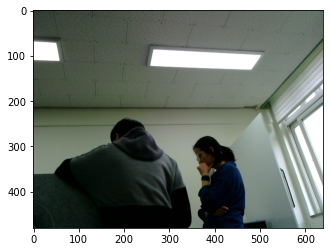

In [6]:
# streaming camera
for cmd in imagery_cmd:
    channel.send({'mode':'command','data':cmd})
    img = (channel.receive())
exec('im_np = np.array(%s)'% img)
plt.imshow(im_np)

In [ ]:
#freeing camera
for cmd in imagery_close_cmd:
    channel.send({'mode':'command','data':cmd})
channel.send({'mode':None,'data':''})
print (channel.receive())

In [8]:

channel.send({'mode':'command','data':x[6]})#'y = \'test\''
# print (channel.receive())
img = (channel.receive())

In [9]:
channel.send({'mode':None,'data':''})
print (channel.receive())

'15 finished'


In [ ]:
# communicating with python on an ssh host

In [2]:
rate, sound = wavfile.read('Free_BellSchool.wav')

/home/obasekore/anaconda3/envs/RL_CoppeliaSim/lib/python3.6/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [8]:
data = sound[:,1]

In [10]:
Audio(data, rate=rate)

In [11]:
Audio(sound[:,0], rate=rate)

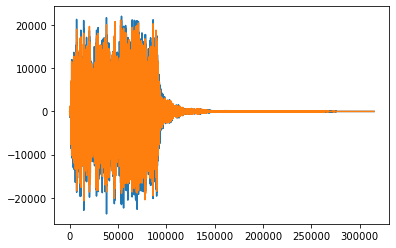

In [13]:
plt.plot(sound[:,1])
plt.plot(sound[:,0])

In [3]:
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=framerate)

In [9]:
data.shape

(314880,)